### Hierachical Clustering
Hierachical Clustering is a method of cluster analysis that seeks building a hierachy of clusters. There are two strategies:
- Hierachical Agglomerative Clustering (HAC) is bottom-up approach which considers each data point as its own cluster, pairs of clusters are merged as one moves up the hierachy
- Hierachical Divisive Clustering (HDC) is top-down approach, this strategy is in the opposite way which consider all data points as single cluster, and splits are performend as one moves down the hierachy

### Linkage criterion
To decide which clusters to merge up (agglomerative) or split down (divisive), a measure of dissimilarity between sets of observations is required. This can be achieved by using an appropriate distance d, and a linkage criterion which specifies the dissimilarity of two sets. There are some linkage criterions:
- Complete-linkage clustering
- Single-linkage clustering
- Unweighted average linkage clustering
- Weighted average linkage clustering
- Centroid linkage clustering
- Median linkage clustering

### Implementation

In [53]:
import numpy as np
import scipy.cluster.hierarchy as sch
import pandas as pd
from matplotlib import pyplot as plt

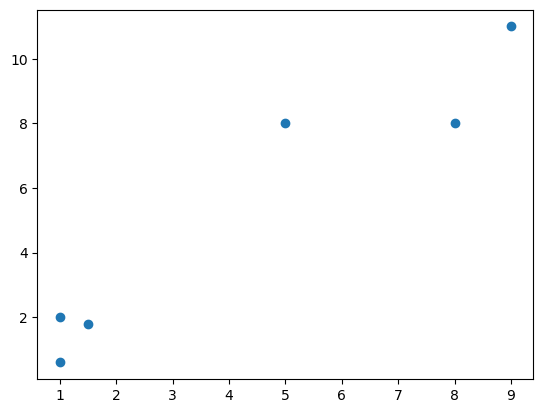

In [14]:
data = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
plt.scatter(data[:, 0], data[:, 1])

In [40]:
def distance(p, q):
    return np.sqrt(np.sum((p - q)**2))

### Build dissimilarity matrix
- Because the dissimilarity matrix is hollow matrix, the number of elements need to be store will be C(n, 2)
- The scipy library already build a function to compute the distance matrix as expected
- The number of new clusters is (n - 1) obviously

In [66]:
n = len(data)
my_d_matrix = np.ones(shape=(n, n))
for i in range(n):
    for j in range(n):
        my_d_matrix[i][j] = distance(data[i], data[j])
pd.DataFrame(my_d_matrix)

,0,1,2,3,4,5
0,0.000000,0.538516,7.211103,9.219544,1.400000,12.041595
1,0.538516,0.000000,7.119691,8.982761,1.300000,11.869709
2,7.211103,7.119691,0.000000,3.000000,8.411896,5.000000
3,9.219544,8.982761,3.000000,0.000000,10.186265,3.162278
4,1.400000,1.300000,8.411896,10.186265,0.000000,13.120976
5,12.041595,11.869709,5.000000,3.162278,13.120976,0.000000


#### Simple merge implementation with single link
__Todo__: update divisive approach

In [89]:
new_cluster_ind = n
for i in range(0, n - 1):
    sub = my_d_matrix[i, i+1:]
    j = np.argmin(sub) + i + 1
    print(f"Merge ({i}, {j}) = cluster {new_cluster_ind}")
    new_cluster_ind += 1

Merge (0, 1) = cluster 6
Merge (1, 4) = cluster 7
Merge (2, 3) = cluster 8
Merge (3, 5) = cluster 9
Merge (4, 5) = cluster 10


#### Scipy hierachical cluster module

In [73]:
d_matrix = sch.distance.pdist(data)
d_matrix

array([ 0.53851648,  7.21110255,  9.21954446,  1.4       , 12.04159458,
        7.119691  ,  8.98276127,  1.3       , 11.86970935,  3.        ,
        8.41189634,  5.        , 10.18626526,  3.16227766, 13.12097557])

In [71]:
linkage_matrix = sch.linkage(d_matrix, method='single')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5]],
 'dcoord': [[0.0, 0.5385164807134504, 0.5385164807134504, 0.0],
  [0.0, 1.5286159317064134, 1.5286159317064134, 0.5385164807134504],
  [0.0, 3.0, 3.0, 0.0],
  [0.0, 4.509249752822894, 4.509249752822894, 3.0],
  [1.5286159317064134,
   16.862285333449513,
   16.862285333449513,
   4.509249752822894]],
 'ivl': ['4', '0', '1', '5', '2', '3'],
 'leaves': [4, 0, 1, 5, 2, 3],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2']}

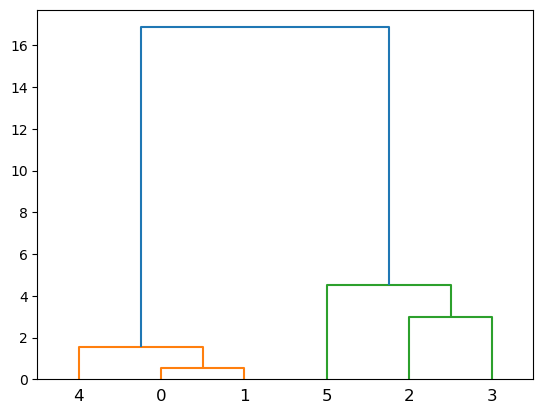

In [69]:
sch.dendrogram(linkage_matrix)